# **BBC News Classification**

## **1\. Introduction**

#### **1.1 Objective statement**
Classify the dataset of BBC news articles into five categories (business, entertainment, politics, sport, tech).  
#### **1.2 Plan**:
  * Implement Unsupervised learning on it
  * Then compare it with supervised learning.


### **1.3 Data description**

**File descriptions**

|File name| Descriptions|
|--|--|
|Train.csv|The BBC News Train dataset which has 1490 records|
|Test.csv|The BBC News test dataset which has 736 records|
|Solution.csv |The BBC News Sample， a sample submission file in the correct format|

**Data fields**

|Field name| Descriptions|
|--|--|
|ArticleId|Article id unique # given to the record|
|Article|text of the header and article|
|Category |cateogry of the article (tech, business, sport, entertainment, politics）|




## **2\. Exploratory Data Analysis (EDA)**

#### **Load the Data:**  
  * Load the training dataset using pandas.  
  * Display the first few rows (.head()) of the dataframe.  
  * Use .info() and .describe() to get a summary of the data.  


In [1]:
import pandas as pd

raw_url_train = 'https://raw.githubusercontent.com/RockDeng110/BBC-News-Classification/main/datasets/BBC%20News%20Train.csv'
raw_url_test = 'https://raw.githubusercontent.com/RockDeng110/BBC-News-Classification/main/datasets/BBC%20News%20Test.csv'
raw_url_sample = 'https://raw.githubusercontent.com/RockDeng110/BBC-News-Classification/main/datasets/BBC%20News%20Sample%20Solution.csv'


df_train = pd.read_csv(raw_url_train)
df_test = pd.read_csv(raw_url_test)
df_sample = pd.read_csv(raw_url_sample)


def get_df_summary(df, df_name):
  # print out name of df
  print(f'\n===== Summary of  {df_name}:')
  print(f'[DataFrame head]:')
  print(df.head())
  print(f'[DataFrame info]:')
  df.info()
  print(f'[DataFrame describe]:')
  print(df.describe())

get_df_summary(df_train, "df_train")
# get_df_summary(df_test, "df_test")
# get_df_summary(df_sample, "df_sample")


===== Summary of  df_train:
[DataFrame head]:
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
[DataFrame info]:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
[DataFrame describe]:
         ArticleId
count  1490.000000
mean   1119.696644
std     641.826283
min       2.000000
25%     565.250000
50%

#### **Data Cleaning:**  
  * Check for missing values (.isnull().sum()) and decide on a strategy to handle them if any exist.  
  * Check for duplicate articles and remove them.  


In [2]:
def count_missing_values(df):
  print(f'Number of missing values: {df.isnull().sum()}')

count_missing_values(df_train)
count_missing_values(df_test)
count_missing_values(df_sample)



Number of missing values: ArticleId    0
Text         0
Category     0
dtype: int64
Number of missing values: ArticleId    0
Text         0
dtype: int64
Number of missing values: ArticleId    0
Category     0
dtype: int64


In [3]:
def count_duplicates(df):
  print(f'Number of duplicates: {df.duplicated().sum()}')

count_duplicates(df_train)
count_duplicates(df_test)
count_duplicates(df_sample)

Number of duplicates: 0
Number of duplicates: 0
Number of duplicates: 0



#### **Text Cleaning:**  
  * Convert all text to lowercase.  
  * Remove punctuation and special characters.  
  * Remove numbers (if they are not considered useful features).  
  * Remove common English stopwords.  

In [4]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords

# Assuming your DataFrame is loaded into df_train
# df_train = pd.read_csv(...)

# Get the standard list of English stopwords
stop_words = set(stopwords.words('english'))



def clean_text(text):
    """
    Cleans and preprocesses a text string by:
    1. Converting to lowercase
    2. Removing punctuation, special characters, and numbers
    3. Removing stopwords
    """
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation, special characters, and numbers
    # This regex keeps only alphabetic characters and spaces
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize the text (split into words)
    words = text.split()

    # 4. Remove common English stopwords
    words = [word for word in words if word not in stop_words]

    # Rejoin the words into a single string
    return ' '.join(words)



  # Apply the preprocessing function to the 'Text' column
df_train['CleanedText'] = df_train['Text'].apply(clean_text)

# Display the original and processed text side-by-side to verify
print("Comparison of Original and Cleaned Text:")
print(df_train[['Text', 'CleanedText']].head())

Comparison of Original and Cleaned Text:
                                                Text  \
0  worldcom ex-boss launches defence lawyers defe...   
1  german business confidence slides german busin...   
2  bbc poll indicates economic gloom citizens in ...   
3  lifestyle  governs mobile choice  faster  bett...   
4  enron bosses in $168m payout eighteen former e...   

                                         CleanedText  
0  worldcom exboss launches defence lawyers defen...  
1  german business confidence slides german busin...  
2  bbc poll indicates economic gloom citizens maj...  
3  lifestyle governs mobile choice faster better ...  
4  enron bosses payout eighteen former enron dire...  


#### **Text Normalization:**  
  * The primary goal of normalization is to reduce the vocabulary size and group related words together. Without it, a machine learning model would treat "run," "running," and "runs" as three completely separate and unrelated features. It has several benifits:
    * Improves Model Generalization
    * Reduces Dimensionality
    * Increases Feature Importance
  * Common Normalization Techniques
    * **Stemming** is a fast, rule-based process that chops off the ends of words to get to a common base or "stem." It's a crude but often effective method.
    * **Lemmatization** is a more sophisticated process that uses a dictionary and analyzes the part of speech to reduce a word to its true root form, known as its "lemma."
  * As lemmatization is generally preferred for better accuracy, we are gonna apply lemmatization here.


In [6]:
import nltk
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    """
    Converts Treebank POS tags to WordNet POS tags.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        # Default to noun if the tag is not recognized
        return wordnet.NOUN



from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def lemmatize_text(text):
    """
    Performs lemmatization on a text string using POS tags.
    """
    lemmatizer = WordNetLemmatizer()
    # Tokenize the text and get POS tags
    pos_tagged_words = nltk.pos_tag(word_tokenize(text))

    # Lemmatize each word with its corresponding POS tag
    lemmatized_words = [
        lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
        for word, tag in pos_tagged_words
    ]

    return ' '.join(lemmatized_words)




# Apply the lemmatization function
df_train['LemmatizedText'] = df_train['CleanedText'].apply(lemmatize_text)

# Display the results to verify
print("Comparison of Processed and Lemmatized Text:")
print(df_train[['CleanedText', 'LemmatizedText']].head())

Comparison of Processed and Lemmatized Text:
                                         CleanedText  \
0  worldcom exboss launches defence lawyers defen...   
1  german business confidence slides german busin...   
2  bbc poll indicates economic gloom citizens maj...   
3  lifestyle governs mobile choice faster better ...   
4  enron bosses payout eighteen former enron dire...   

                                      LemmatizedText  
0  worldcom exboss launch defence lawyer defend f...  
1  german business confidence slides german busin...  
2  bbc poll indicate economic gloom citizen major...  
3  lifestyle governs mobile choice faster well fu...  
4  enron boss payout eighteen former enron direct...  


#### **Data Visualization:**  
  * **Visualize Category Distribution:** Create a bar chart to visualize the number of articles in each category. Check for class imbalance.  


Number of observations per category:
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


/tmp/ipython-input-1726768656.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature_name, palette='viridis')


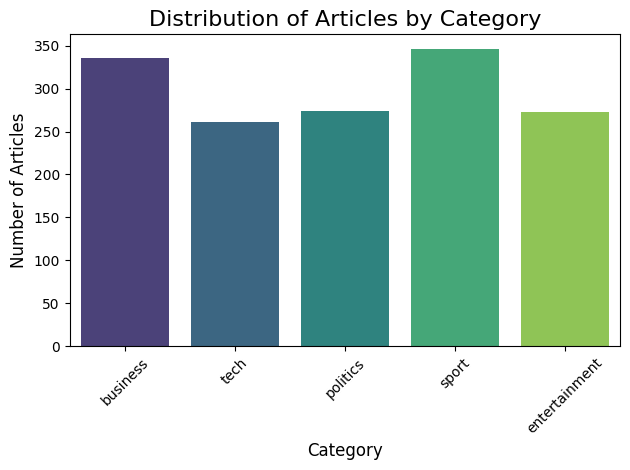

The imbalance ratio is: 1.33:1


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


def check_category_distribution(df, feature_name):
  # get count numbers of each categories
  category_counts = df_train[feature_name].value_counts()

  # print info
  print("Number of observations per category:")
  print(category_counts)

  # visualize info
  plt.figure()
  sns.countplot(data=df, x=feature_name, palette='viridis')
  plt.title('Distribution of Articles by Category', fontsize=16)
  #plt.figure()
  plt.xlabel(feature_name, fontsize=12)
  plt.ylabel('Number of Articles', fontsize=12)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

check_category_distribution(df_train, "Category")


# Dataset with ratio under 1.5 is generally considered balence
def get_imbalence_ratio(df, feature_name):
  # get count numbers of each categories
  category_counts = df_train[feature_name].value_counts()
  # 2. Get the majority and minority counts
  majority_count = category_counts.max()
  minority_count = category_counts.min()

  # 3. Calculate the imbalance ratio
  imbalance_ratio = majority_count / minority_count
  print(f"The imbalance ratio is: {imbalance_ratio:.2f}:1")

get_imbalence_ratio(df_train, "Category")


**Dataset with ratio under 1.5 is generally considered balence**

  * **Text Length Analysis:**  
    * Calculate the length of each article (word count and character count).  
    * Plot histograms or boxplots of article lengths for each category to see if there are any noticeable differences.  


   ArticleId                                               Text  Category  \
0       1833  worldcom ex-boss launches defence lawyers defe...  business   
1        154  german business confidence slides german busin...  business   
2       1101  bbc poll indicates economic gloom citizens in ...  business   
3       1976  lifestyle  governs mobile choice  faster  bett...      tech   
4        917  enron bosses in $168m payout eighteen former e...  business   

                                         CleanedText  \
0  worldcom exboss launches defence lawyers defen...   
1  german business confidence slides german busin...   
2  bbc poll indicates economic gloom citizens maj...   
3  lifestyle governs mobile choice faster better ...   
4  enron bosses payout eighteen former enron dire...   

                                      LemmatizedText  TextLength  
0  worldcom exboss launch defence lawyer defend f...        1866  
1  german business confidence slides german busin...        2016  

/tmp/ipython-input-3326502127.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='Category', y='TextLength', palette='viridis')


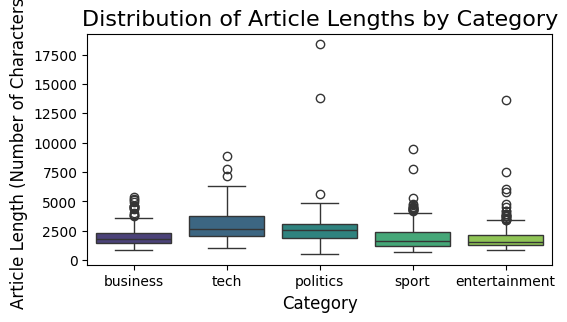

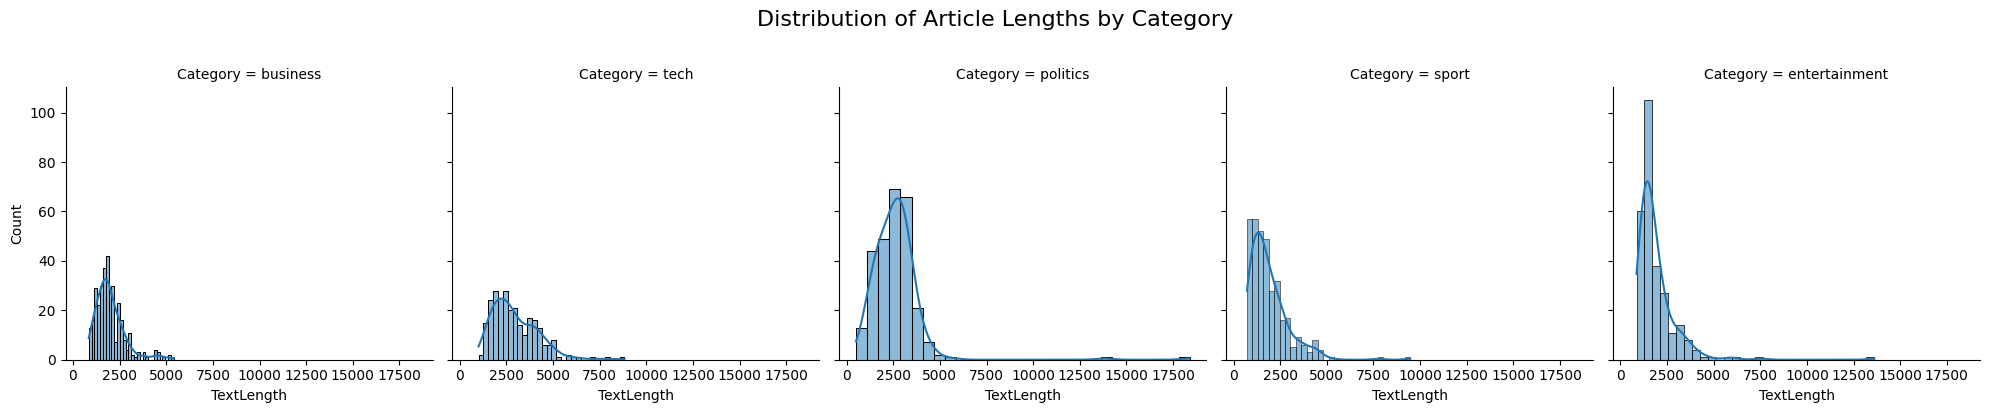

In [8]:
"""
===== Summary of  df_train:
[DataFrame head]:
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
"""

# dataset is like above. I need to calculate length of article first,
# then group them in the five categories, which are business, entertainment, politics, sport and tech,
# Plot histograms or boxplots for each one of them.

df_train['TextLength'] = df_train['Text'].str.len()
print(df_train.head())

# Set the figure size for better readability
plt.figure(figsize=(6, 3))

# Create a boxplot to compare article lengths across categories
sns.boxplot(data=df_train, x='Category', y='TextLength', palette='viridis')

# Add a title and labels for clarity
plt.title('Distribution of Article Lengths by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Article Length (Number of Characters)', fontsize=12)

# Show the plot
plt.show()


# Create a FacetGrid to plot a histogram for each category
g = sns.FacetGrid(df_train, col='Category', col_wrap=5, height=4)

# Map a histogram to each subplot in the grid
g.map(sns.histplot, 'TextLength', bins=30, kde=True)

# Add a title for the entire plot
g.fig.suptitle('Distribution of Article Lengths by Category', y=1.02, fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


  * **Word Frequency Analysis:**  
    * Identify the most common words in the entire corpus.  
    * Create word clouds for each category to visualize the most frequent and important words.  
    * Use bar charts to show the frequency of top N words per category after removing stopwords.

In [9]:
# find most common words
from collections import Counter

# Join all the cleaned text into a single string
all_text = ' '.join(df_train['LemmatizedText'])

# Split the string into a list of words
all_words = all_text.split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the 15 most common words
most_common_words = word_counts.most_common(15)

print("Top 15 most common words in the entire corpus:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Top 15 most common words in the entire corpus:
say: 5887
mr: 1989
year: 1872
would: 1711
make: 1444
also: 1426
new: 1348
people: 1323
u: 1256
one: 1190
take: 1151
go: 1131
could: 1032
game: 1030
get: 1010


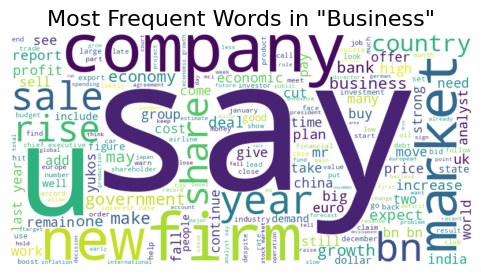

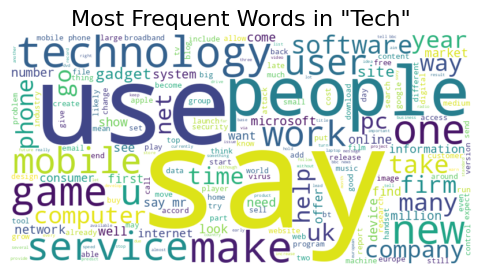

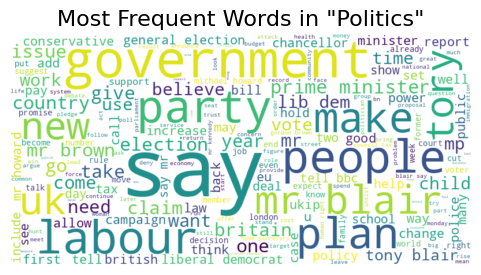

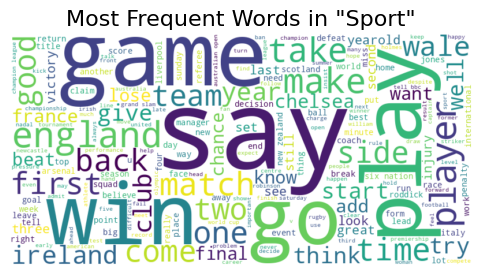

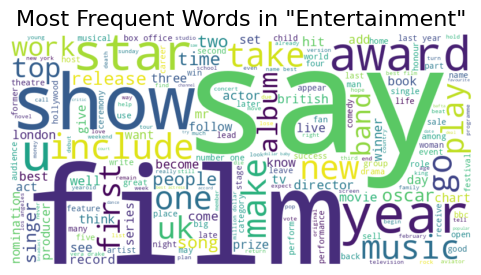

In [10]:
# word cloud for each category
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the unique categories
categories = df_train['Category'].unique()

for category in categories:
    # Filter the text for the current category
    category_text = ' '.join(df_train[df_train['Category'] == category]['LemmatizedText'])

    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)

    # Plot the word cloud
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Frequent Words in "{category.capitalize()}"', fontsize=16)
    plt.axis('off')
    plt.show()

/tmp/ipython-input-281555270.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')


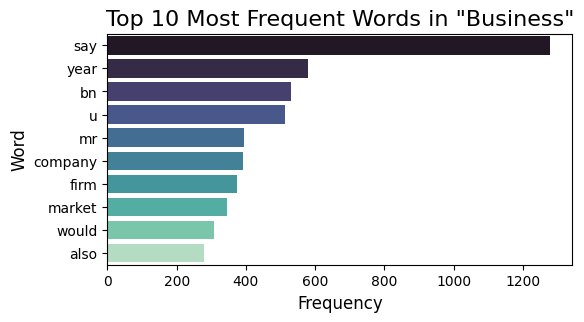

/tmp/ipython-input-281555270.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')


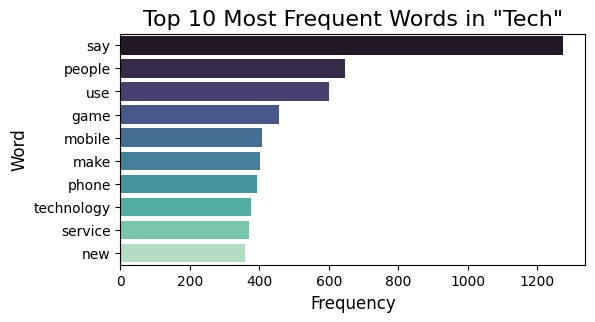

/tmp/ipython-input-281555270.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')


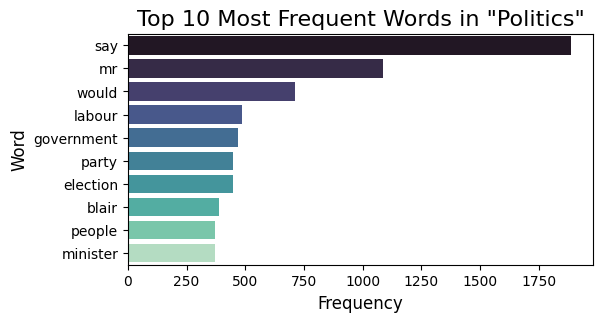

/tmp/ipython-input-281555270.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')


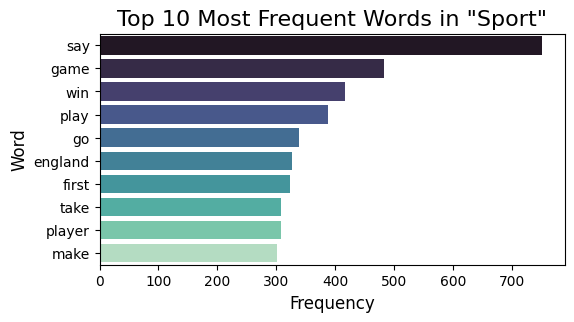

/tmp/ipython-input-281555270.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')


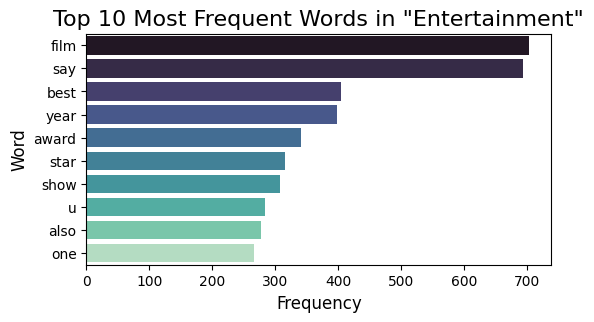

In [11]:
# bar chat
import seaborn as sns
from collections import Counter

# Set N for the top N words
N = 10

for category in categories:
    # Filter text for the current category and create a list of all words
    category_words = ' '.join(df_train[df_train['Category'] == category]['LemmatizedText']).split()

    # Count the words
    category_word_counts = Counter(category_words)

    # Get the top N most common words and their frequencies
    top_words = category_word_counts.most_common(N)

    # Create a DataFrame for plotting
    df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    # Plot the bar chart
    plt.figure(figsize=(6, 3))
    sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')
    plt.title(f'Top {N} Most Frequent Words in "{category.capitalize()}"', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.show()



### **3\. Data Preprocessing**





* **Feature Engineering (Text Representation):**  
  Machine learning models don't understand words or sentences; they understand numbers. The goal of feature engineering for text is to translate your text data into a numerical format that captures its meaning and importance.

  TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document in a collection or corpus. It assigns a weight to each word, giving higher scores to words that are more unique and relevant to a specific document.
  * **TF-IDF (Term Frequency-Inverse Document Frequency):**  
    * **TF(Term Frequency)**: This metric measures how often a word appears in a single document.
    * **IDF(Inverse Document Frequency)**:This metric measures how rare a word is across all documents in your collection. It acts as a penalty for common words.
    * **TF-IDF Score = TF * IDF**:A word gets a high TF-IDF score if it appears frequently in a specific document (high TF) but is rare across all other documents (high IDF).

    * Use TfidfVectorizer from scikit-learn to conduct the TF-IDF on dataset.  
    * **TODO**: Discuss key parameters like max_features, ngram_range, and min_df/max_df.  


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# We'll limit the number of features to the 5000 most frequent words
tfidf_vectorizer = TfidfVectorizer(max_features=5000)



import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer to the data and transform the text into a matrix
X = tfidf_vectorizer.fit_transform(df_train['LemmatizedText'])


# Check the shape of the resulting sparse matrix
# (Number of documents, Number of features/words)
print("Shape of the TF-IDF matrix:", X.shape)

# You can also see the words that were learned as features
print("\nSome of the learned feature names (vocabulary):")
print(tfidf_vectorizer.get_feature_names_out()[:20])


Shape of the TF-IDF matrix: (1490, 5000)

Some of the learned feature names (vocabulary):
['abandon' 'abbas' 'abc' 'ability' 'able' 'abn' 'abolish' 'abroad' 'absa'
 'absence' 'absolute' 'absolutely' 'abuse' 'abused' 'ac' 'academic'
 'academy' 'accelerate' 'accept' 'acceptable']


* **Data Splitting:**  
  * Split the data into training and validation sets using train\_test\_split. Ensure a stratified split if there is a class imbalance.

In [40]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assume 'X' is your TF-IDF matrix from the previous step
# Assume 'df_train' is your DataFrame
# X = tfidf_vectorizer.fit_transform(df_train['LemmatizedText'])

# 'y' is your target variable (the labels)
y = df_train['Category']

# Split the data: 80% for training, 20% for validation
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,      # Use 20% of the data for validation
    random_state=42,    # Ensures the split is the same every time you run the code
    stratify=y          # Ensures the proportion of categories is the same in train and validation sets
)

# Check the shapes of the new datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

X_full = X
y_full = y

Shape of X_train: (1192, 5000)
Shape of X_val: (298, 5000)
Shape of y_train: (1192,)
Shape of y_val: (298,)


## **4. Unsupervised Model**
* After cleaning, EDA, preprocessing and data splitting, we are ready to build models.
* First off all, we are going to build an unsupervised model. Then evaluate and tune it.

#### **Build NMF model**
* For classification on dataset without label, it is intuitively to implement Clustering.
* But actually there is an alternative named "Topic Modeling", which is also suitable for this problem.
* Topic modeling relies heavily on matrix factorization, which is more relevant to the requirements of this assignment, so I chose this method instead of clustering.
* Next, I will try to conduct Topic Modeling with Non-negative Matrix Factorization and TF-IDF.

In [24]:
from sklearn.decomposition import NMF # Import NMF

def display_topics(model, feature_names, top_n_words):
    """打印NMF或LDA模型发现的每个主题的关键词"""
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-top_n_words - 1:-1]])
        print(message)

# --- 假设你已经训练好了nmf模型和tfidf_vectorizer ---
nmf_model_full = NMF(n_components=5, random_state=42, max_iter=1000).fit(X_full)
nmf_model_train = NMF(n_components=5, random_state=42, max_iter=1000).fit(X_train)

# 获取TF-IDF特征的单词列表
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# 调用函数来查看5个主题，每个主题显示10个关键词
display_topics(nmf_model_full, tfidf_feature_names, 10)

Topic #0: film award best star actor oscar actress festival nomination director
Topic #1: mr labour election blair say party tory brown tax minister
Topic #2: mobile phone people use technology say music service user digital
Topic #3: game england win play player say match cup ireland side
Topic #4: bn growth say economy rate rise bank market year sale


At first glance, the five topics identified by NMF correspond very accurately to the labels in the dataset, namely, **technology, politics, entertainment, sports, and business**.

#### **Evaluate NMF model**

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# --- 假设以下对象已经存在于你的环境中 ---
# nmf_model: 已经在 X_train 上训练好的NMF模型
# X_train, X_val: TF-IDF特征矩阵
# y_train, y_val: 对应的真实类别标签 (Pandas Series)

# --- 步骤1: 为每个文档预测其“主导主题” ---
print("--- Step 1: Predicting Dominant Topics ---")

# 对训练集进行转换，并找到每个文档权重最高的主题索引
train_topic_distribution = nmf_model_train.transform(X_train)
train_topic_preds = np.argmax(train_topic_distribution, axis=1)

# 对验证集/测试集进行转换，并找到主导主题
val_topic_distribution = nmf_model_train.transform(X_val)
val_topic_preds = np.argmax(val_topic_distribution, axis=1)

print("Prediction of dominant topics complete.")


# --- 步骤2: 创建主题到真实类别的映射关系 ---
print("\n--- Step 2: Creating Topic-to-Category Map ---")

# 我们创建一个临时的DataFrame来轻松完成这个映射
# 注意：映射关系只能通过训练数据来建立，不能偷看验证集/测试集
df_train_preds = pd.DataFrame({'true_label': y_train, 'topic_pred': train_topic_preds})

# 使用groupby找到每个主题簇中最常见的真实标签
topic_to_category_map = df_train_preds.groupby('topic_pred')['true_label'].agg(lambda x: x.mode()[0]).to_dict()

print("Discovered Topic-to-Category Map:")
print(topic_to_category_map)


# --- 步骤3: 应用映射并评估性能 ---
print("\n--- Step 3: Applying Map and Evaluating Performance ---")

# 将数字形式的主题预测，转换为字符串形式的类别预测
y_train_mapped_preds = pd.Series(train_topic_preds).map(topic_to_category_map)
y_val_mapped_preds = pd.Series(val_topic_preds).map(topic_to_category_map)

# ---- 测量训练表现 (Train Performance) ----
print("\n--- Train Performance (Unsupervised Topic Model) ---")
train_accuracy = accuracy_score(y_train, y_train_mapped_preds)
print(f"Train Accuracy: {train_accuracy:.4f}")
print("Train Classification Report:")
print(classification_report(y_train, y_train_mapped_preds))


# ---- 测量测试表现 (Test Performance) ----
print("\n--- Test Performance (Unsupervised Topic Model) ---")
test_accuracy = accuracy_score(y_val, y_val_mapped_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(classification_report(y_val, y_val_mapped_preds))

--- Step 1: Predicting Dominant Topics ---
Prediction of dominant topics complete.

--- Step 2: Creating Topic-to-Category Map ---
Discovered Topic-to-Category Map:
{0: 'sport', 1: 'politics', 2: 'tech', 3: 'entertainment', 4: 'business'}

--- Step 3: Applying Map and Evaluating Performance ---

--- Train Performance (Unsupervised Topic Model) ---
Train Accuracy: 0.9220
Train Classification Report:
               precision    recall  f1-score   support

     business       0.92      0.92      0.92       269
entertainment       0.96      0.85      0.90       218
     politics       0.91      0.91      0.91       219
        sport       0.96      0.99      0.97       277
         tech       0.85      0.93      0.89       209

     accuracy                           0.92      1192
    macro avg       0.92      0.92      0.92      1192
 weighted avg       0.92      0.92      0.92      1192


--- Test Performance (Unsupervised Topic Model) ---
Test Accuracy: 0.9161
Test Classification Repor

As we can see above, the Train Accuracy 0.9220 which is not bad suggests there is no underfitting. Addtionally, the test accuracy of 0.9161 is very close to the train accuracy, which means the model is performing pretty good on the test dataset.

#### **Tune NMF model**

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score

# --- 假设 df_train['LemmatizedText'] 和 df_train['Category'] 已经存在 ---

# --------------------------------------------------------------------------
# 步骤1：明确分割训练集与验证集 (80% 训练, 20% 验证)
# --------------------------------------------------------------------------
X_text_train, X_text_val, y_train, y_val = train_test_split(
    df_train['LemmatizedText'],
    df_train['Category'],
    test_size=0.2,
    random_state=42,
    stratify=df_train['Category'] # 确保分割后类别比例不变
)

print(f"Data split into {len(X_text_train)} training samples and {len(X_text_val)} validation samples.")


# --------------------------------------------------------------------------
# 步骤2：手动实现超参数搜索循环
# --------------------------------------------------------------------------

# 定义我们要搜索的超参数网格
param_grid = {
    # --- TF-IDF Vectorizer 参数 ---
    'tfidf__min_df': [2, 5, 10],
    'tfidf__max_df': [0.8, 0.9],
    'tfidf__ngram_range': [(1, 1), (1, 2)],

    # --- NMF 模型参数 ---
    'nmf__n_components': [5, 7, 10, 15],
    # 'nmf__beta_loss': ['frobenius', 'kullback-leibler'],
    # 'nmf__solver': ['cd', 'mu']
}

# 初始化变量，用于存储最佳结果
best_score = -1
best_params = {}
best_tfidf_model = None # 新增：用于保存最佳的TF-IDF模型
best_nmf_model = None   # 新增：用于保存最佳的NMF模型

# 创建参数组合
parameter_combinations = list(ParameterGrid(param_grid))

print(f"\nStarting hyperparameter tuning loop for {len(parameter_combinations)} combinations...")

for params in parameter_combinations:
    print("-" * 50)
    print(f"Testing parameters: {params}")

    # 1. 使用当前参数组合，在新的训练集上训练模型
    tfidf = TfidfVectorizer(min_df=params['tfidf__min_df'],
                            ngram_range=params['tfidf__ngram_range'])

    nmf = NMF(n_components=params['nmf__n_components'],
              random_state=42, max_iter=1000)

    # 在训练文本上fit_transform TF-IDF
    X_train_tfidf = tfidf.fit_transform(X_text_train)
    # 在TF-IDF特征上fit NMF
    nmf.fit(X_train_tfidf)

    # 2. 在验证集上进行预测
    #    关键：使用已经fit好的tfidf对象，只进行transform
    X_val_tfidf = tfidf.transform(X_text_val)
    val_topic_distribution = nmf.transform(X_val_tfidf)
    val_topic_preds = np.argmax(val_topic_distribution, axis=1)

    # 3. 计算“测试表现” (Validation Accuracy)
    #    3a. 建立标签映射关系 (必须只使用训练数据来建立)
    train_topic_distribution = nmf.transform(X_train_tfidf)
    train_topic_preds = np.argmax(train_topic_distribution, axis=1)

    df_train_preds = pd.DataFrame({'true_label': y_train, 'topic_pred': train_topic_preds})
    topic_to_category_map = df_train_preds.groupby('topic_pred')['true_label'].agg(lambda x: x.mode()[0]).to_dict()

    #    3b. 应用映射并计算验证集精度
    val_mapped_preds = pd.Series(val_topic_preds).map(topic_to_category_map).fillna('unknown')

    current_accuracy = accuracy_score(y_val, val_mapped_preds)
    print(f"Validation Accuracy for this combination: {current_accuracy:.4f}")

    # 4. 检查并保存最佳结果
    if current_accuracy > best_score:
        best_score = current_accuracy
        best_params = params
        best_tfidf_model = tfidf # 新增：保存当前最佳的tfidf对象
        best_nmf_model = nmf   # 新增：保存当前最佳的nmf对象
        print(f"!!! New best score found: {best_score:.4f} !!!")

# --------------------------------------------------------------------------
# 步骤3：输出最终的最佳参数组合
# --------------------------------------------------------------------------
print("\n" + "="*50)
print("Hyperparameter tuning complete.")
print(f"The best validation accuracy was: {best_score:.4f}")
print(f"The best parameters found are: {best_params}")
print("\nBest TF-IDF Model found:", best_tfidf_model)
print("Best NMF Model found:", best_nmf_model)

Data split into 1192 training samples and 298 validation samples.

Starting hyperparameter tuning loop for 48 combinations...
--------------------------------------------------
Testing parameters: {'nmf__n_components': 5, 'tfidf__max_df': 0.8, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)}
Validation Accuracy for this combination: 0.9262
!!! New best score found: 0.9262 !!!
--------------------------------------------------
Testing parameters: {'nmf__n_components': 5, 'tfidf__max_df': 0.8, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Validation Accuracy for this combination: 0.9329
!!! New best score found: 0.9329 !!!
--------------------------------------------------
Testing parameters: {'nmf__n_components': 5, 'tfidf__max_df': 0.8, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 1)}
Validation Accuracy for this combination: 0.9262
--------------------------------------------------
Testing parameters: {'nmf__n_components': 5, 'tfidf__max_df': 0.8, 'tfidf__min_df': 5, 'tfidf__ngr

## **5\. Supervised Model Building**

#### **Build models**
* **Baseline Model:**  
  * Start with a simple, interpretable  **Logistic Regression**.  
  * Train the model on the TF-IDF vectors.  


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- Assume X_train, y_train, X_val, and y_val are already defined ---
# X_train, X_val are the TF-IDF sparse matrices
# y_train, y_val are the corresponding category labels

# 1. Initialize the Logistic Regression model
#    - random_state=42 ensures reproducibility.
#    - max_iter=1000 is set to ensure the model has enough iterations to converge.
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train the model on the training data
print("Training the Logistic Regression model...")
lr_model.fit(X_train, y_train)
print("Training complete.")

# 3. Make predictions on the validation set
y_pred_lr = lr_model.predict(X_val)

# 4. Evaluate the model's performance
print("\n--- Evaluation of Logistic Regression Baseline ---")

# Calculate and print the accuracy
accuracy = accuracy_score(y_val, y_pred_lr)
print(f"Accuracy: {accuracy:.4f}\n")

# Print the detailed classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_lr))

Training the Logistic Regression model...
Training complete.

--- Evaluation of Logistic Regression Baseline ---
Accuracy: 0.9664

Classification Report:
               precision    recall  f1-score   support

     business       0.92      0.99      0.95        67
entertainment       0.98      1.00      0.99        55
     politics       0.98      0.91      0.94        55
        sport       1.00      1.00      1.00        69
         tech       0.96      0.92      0.94        52

     accuracy                           0.97       298
    macro avg       0.97      0.96      0.97       298
 weighted avg       0.97      0.97      0.97       298



* **Alternative Models:**  
  * Train a few more powerful models. Good candidates include:  
    * **Support Vector Machines (SVM)**  
    * **Random Forest**  




In [15]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# --- Assume X_train, y_train, X_val, and y_val are ready ---

# 1. Initialize the LinearSVC model
svm_model = LinearSVC(random_state=42, dual=True)

# 2. Train the model
print("Training the SVM model...")
svm_model.fit(X_train, y_train)
print("Training complete.")

# 3. Make predictions and evaluate
print("\n--- Evaluation of Support Vector Machine ---")
y_pred_svm = svm_model.predict(X_val)
print(classification_report(y_val, y_pred_svm))

Training the SVM model...
Training complete.

--- Evaluation of Support Vector Machine ---
               precision    recall  f1-score   support

     business       0.99      1.00      0.99        67
entertainment       0.98      1.00      0.99        55
     politics       1.00      0.95      0.97        55
        sport       0.99      1.00      0.99        69
         tech       0.96      0.96      0.96        52

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# --- Assume X_train, y_train, X_val, and y_val are ready ---

# 1. Initialize the RandomForestClassifier
#    - n_jobs=-1 uses all available CPU cores to speed up training.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Training complete.")

# 3. Make predictions and evaluate
print("\n--- Evaluation of Random Forest ---")
y_pred_rf = rf_model.predict(X_val)
print(classification_report(y_val, y_pred_rf))

Training the Random Forest model...
Training complete.

--- Evaluation of Random Forest ---
               precision    recall  f1-score   support

     business       0.89      0.96      0.92        67
entertainment       0.98      0.98      0.98        55
     politics       0.96      0.89      0.92        55
        sport       0.97      1.00      0.99        69
         tech       0.94      0.88      0.91        52

     accuracy                           0.95       298
    macro avg       0.95      0.94      0.94       298
 weighted avg       0.95      0.95      0.95       298



#### **Model Evaluation**


* **Model Comparison:**  
  * Make predictions on the validation set for each trained model.  
  * Generate a classification report and a confusion matrix for each model.  
  * Create a summary table or bar chart to compare the key metrics (e.g., accuracy, F1-score) across all models.  
  * Select the best-performing model based on the evaluation results.


In [36]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# --- Assume y_val and all predictions (y_pred_lr, y_pred_svm, etc.) are available ---

# Create a dictionary to store the results
model_performance = {
    'Model': [
        'Logistic Regression',
        'Support Vector Machine (SVM)',
        'Random Forest',
    ],
    'Accuracy': [
        accuracy_score(y_val, y_pred_lr),
        accuracy_score(y_val, y_pred_svm),
        accuracy_score(y_val, y_pred_rf),
    ],
    'Weighted F1-Score': [
        f1_score(y_val, y_pred_lr, average='weighted'),
        f1_score(y_val, y_pred_svm, average='weighted'),
        f1_score(y_val, y_pred_rf, average='weighted'),
    ]
}

# Convert the dictionary to a pandas DataFrame
performance_df = pd.DataFrame(model_performance).sort_values(by='Weighted F1-Score', ascending=False)

print("Model Performance Comparison:")
print(performance_df)

Model Performance Comparison:
                          Model  Accuracy  Weighted F1-Score
1  Support Vector Machine (SVM)  0.983221           0.983120
0           Logistic Regression  0.966443           0.966303
2                 Random Forest  0.946309           0.946066


/tmp/ipython-input-1544212669.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x='Weighted F1-Score', y='Model', palette='viridis')


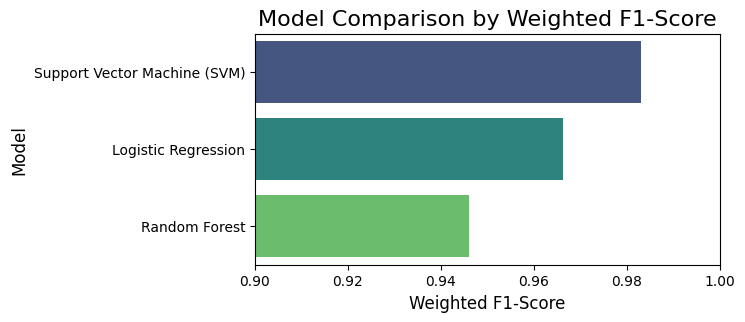

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(6, 3))
sns.barplot(data=performance_df, x='Weighted F1-Score', y='Model', palette='viridis')

# Add titles and labels
plt.title('Model Comparison by Weighted F1-Score', fontsize=16)
plt.xlabel('Weighted F1-Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Set the x-axis limit to make differences more visible if scores are high
# For example, if all scores are above 90%
plt.xlim(0.9, 1.0)

plt.show()


#### **Hyperparameter Tuning (for the Best Model)**

* **Tuning Strategy:**  
  * Choose a hyperparameter tuning technique like **GridSearchCV** or **RandomizedSearchCV** for the best-performing model from the previous step.  
  * Define the parameter grid to search over.  
* **Final Model Training:**  
  * Train the selected model with the best hyperparameters found during tuning on the **entire training dataset**.



In [20]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# --- Assume X_train and y_train are ready from your train-test split ---

# 1. Define the parameter grid to search
#    We will test different values for the regularization parameter 'C'.
#    A smaller C specifies stronger regularization.
param_grid = {
    'C': [0.1, 1, 10, 100]
}

# 2. Set up GridSearchCV
#    - LinearSVC() is our model to tune.
#    - cv=5 means 5-fold cross-validation.
#    - n_jobs=-1 uses all available CPU cores.
#    - verbose=2 provides progress updates.
print("Starting GridSearchCV to find the best C parameter for SVM...")
grid_search = GridSearchCV(
    LinearSVC(random_state=42, dual=True, max_iter=2000),
    param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# 3. Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# 4. Print the best parameters found
print("\nGridSearchCV complete.")
print(f"The best hyperparameter value for C is: {grid_search.best_params_['C']}")

Starting GridSearchCV to find the best C parameter for SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

GridSearchCV complete.
The best hyperparameter value for C is: 1


In [21]:
# --- Assume df_train, tfidf_vectorizer, and grid_search from previous steps ---

print("\n--- Training the Final Model on the Entire Dataset ---")

# 1. Re-fit the TfidfVectorizer on the FULL training dataset
print("Re-fitting the vectorizer on all text data...")
#X_full = tfidf_vectorizer.fit_transform(df_train['LemmatizedText'])
#y_full = df_train['Category']

# 2. Get the best C value from the grid search
best_c_value = grid_search.best_params_['C']

# 3. Initialize the final model with the best hyperparameter
final_model = LinearSVC(C=best_c_value, random_state=42, dual=True, max_iter=2000)

# 4. Train the final model on the entire dataset
print(f"Training final SVM model with C={best_c_value} on {X_full.shape[0]} samples...")
final_model.fit(X_full, y_full)
print("Final model training complete.")


--- Training the Final Model on the Entire Dataset ---
Re-fitting the vectorizer on all text data...
Training final SVM model with C=1 on 1490 samples...
Final model training complete.


In [22]:
#  Make evaluate
print("\n--- Evaluation of final model ---")
y_pred_final = final_model.predict(X_full)
print(classification_report(y_full, y_pred_final))


--- Evaluation of final model ---
               precision    recall  f1-score   support

     business       1.00      1.00      1.00       336
entertainment       1.00      1.00      1.00       273
     politics       1.00      1.00      1.00       274
        sport       1.00      1.00      1.00       346
         tech       1.00      1.00      1.00       261

     accuracy                           1.00      1490
    macro avg       1.00      1.00      1.00      1490
 weighted avg       1.00      1.00      1.00      1490



## **6. Supervised Vs. Unsupervised**

#### **Accuracy comparison**
* The best validation accuracy we got from unsupervised models was **0.9362**.
* The best validation accuracy we got from supervised models was **1.0**.
* Therefore, Supervised learning, especially the SVM, is way more better than unsupervised models on this dataset.

#### **Data-efficient comparision**
* Compare the best supervised model and unsupervised model
* Include only 10%, 20%, 40%, 60%, 80%, 100% of labels, and observe train and test accuracy changes


--- Training with 10% of the training data ---

--- Training with 20% of the training data ---

--- Training with 40% of the training data ---

--- Training with 60% of the training data ---

--- Training with 80% of the training data ---

--- Training with 100% of the training data ---


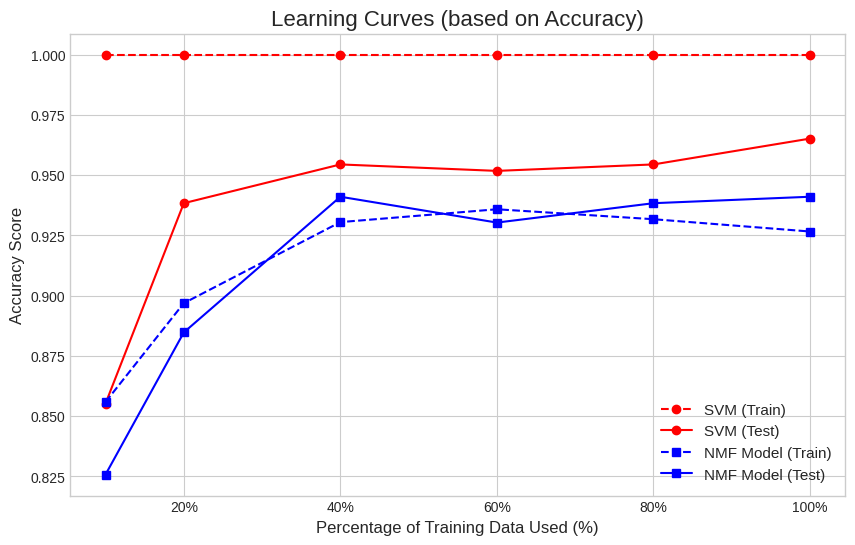

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # Import mticker


# --- 假设 df_train 和 你的自定义 TopicModelClassifier 类已经存在 ---
# from my_custom_classifier import TopicModelClassifier # 假设你把它保存在一个文件里

# --------------------------------------------------------------------------
# 准备工作: 定义最优参数
# --------------------------------------------------------------------------
# The best parameters found are: {'nmf__n_components': 5, 'tfidf__max_df': 0.8, 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 2)}

best_svm_tfidf_params = {'min_df': 10, 'max_df': 0.8, 'ngram_range': (1, 2)}
best_svm_clf_params = {'C': 1.0} #
best_nmf_params = {'n_components': 5}


# --------------------------------------------------------------------------
# 步骤1 & 2: 定义训练规模，并一次性分割数据
# --------------------------------------------------------------------------
# 定义要测试的训练集规模百分比
training_sizes_percent = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

# 分割出一个固定的全局训练集和测试集
X_train_full, X_test, y_train_full, y_test = train_test_split(
    df_train['LemmatizedText'],
    df_train['Category'],
    test_size=0.25, # 留出25%作为固定的测试集
    random_state=42,
    stratify=df_train['Category']
)

# --------------------------------------------------------------------------
# 步骤3: 循环遍历不同规模的训练子集，进行训练和评估
# --------------------------------------------------------------------------
results_acc = []
for size_percent in training_sizes_percent:
    print(f"\n--- Training with {size_percent*100:.0f}% of the training data ---")

    # 3a. 从全局训练集中创建子集
    # 使用 train_test_split 的一个技巧来创建分层抽样的子集
    if size_percent < 1.0:
        X_subset, _, y_subset, _ = train_test_split(
            X_train_full, y_train_full,
            train_size=size_percent, random_state=42, stratify=y_train_full
        )
    else:
        X_subset, y_subset = X_train_full, y_train_full

    current_size = len(y_subset)

    # --- 训练和评估SVM ---
    # Create a pipeline for SVM with TF-IDF
    svm_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(**best_svm_tfidf_params)),
        ('clf', LinearSVC(**best_svm_clf_params))
    ])
    svm_pipeline.fit(X_subset, y_subset)
    svm_train_pred_acc = svm_pipeline.predict(X_subset)
    svm_test_pred_acc = svm_pipeline.predict(X_test)
    svm_train_acc = accuracy_score(y_subset, svm_train_pred_acc)
    svm_test_acc = accuracy_score(y_test, svm_test_pred_acc)

    # --- 训练和评估NMF模型 ---
    # Create a pipeline for NMF with TF-IDF and a custom classifier
    # Assuming TopicModelClassifier is defined elsewhere and takes NMF model
    # For demonstration, we'll just train NMF and evaluate mapping accuracy
    # based on the NMF evaluation logic we used before.

    # Initialize and train the NMF model
    # Need to fit TF-IDF on the subset first, then train NMF
    nmf_tfidf = TfidfVectorizer(min_df=best_svm_tfidf_params['min_df'],
                                max_df=best_svm_tfidf_params['max_df'],
                               ngram_range=best_svm_tfidf_params['ngram_range'])
    X_subset_tfidf = nmf_tfidf.fit_transform(X_subset)

    nmf_model = NMF(n_components=best_nmf_params['n_components'],
                    random_state=42, max_iter=1000)
    nmf_model.fit(X_subset_tfidf)

    # Evaluate NMF using the topic mapping accuracy on the subset and test set
    # Need to transform test set using the nmf_tfidf fitted on the subset
    X_test_tfidf = nmf_tfidf.transform(X_test)

    # Define a function to evaluate NMF based on the accuracy of the topic-to-category mapping
    def evaluate_nmf_accuracy_subset(nmf_model, X, y):
        """
        Evaluates NMF performance by mapping topics to the most frequent true category
        and calculating the accuracy.
        """
        # Transform the data to get topic distributions
        topic_distribution = nmf_model.transform(X)
        topic_preds = np.argmax(topic_distribution, axis=1)

        # Create a temporary DataFrame to find the best mapping
        # Reset the index of y to ensure alignment with topic_preds
        df_preds = pd.DataFrame({'true_label': y.reset_index(drop=True), 'topic_pred': topic_preds})

        # Find the best mapping from topic to true label
        topic_to_category_map = df_preds.groupby('topic_pred')['true_label'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()


        # Map predictions, handling potential None values if a topic doesn't map clearly
        mapped_preds = pd.Series(topic_preds).map(topic_to_category_map)

        # Drop rows where mapping resulted in None (topic didn't map to any category mode)
        # We need to align mapped_preds and y before calculating accuracy
        valid_indices = mapped_preds.dropna().index
        mapped_preds_cleaned = mapped_preds.loc[valid_indices]
        y_cleaned = y.reset_index(drop=True).loc[valid_indices]


        # Calculate and return the accuracy
        if mapped_preds_cleaned.empty:
            return 0.0
        return accuracy_score(y_cleaned, mapped_preds_cleaned)


    nmf_train_acc = evaluate_nmf_accuracy_subset(nmf_model, X_subset_tfidf, y_subset)
    nmf_test_acc = evaluate_nmf_accuracy_subset(nmf_model, X_test_tfidf, y_test)


    results_acc.append({
        'train_size': current_size,
        'svm_train_acc': svm_train_acc,
        'svm_test_acc': svm_test_acc,
        'nmf_train_acc': nmf_train_acc,
        'nmf_test_acc': nmf_test_acc
    })

results_acc_df = pd.DataFrame(results_acc)



# --------------------------------------------------------------------------
# 步骤4: 绘制学习曲线 (横轴更新为百分比)
# --------------------------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# 横轴数据使用我们最初定义的百分比列表 (乘以100)
x_axis_data = [p * 100 for p in training_sizes_percent]

# 绘制曲线，X轴使用新的百分比数据
ax.plot(x_axis_data, results_acc_df['svm_train_acc'], 'o--', color='r', label='SVM (Train)')
ax.plot(x_axis_data, results_acc_df['svm_test_acc'], 'o-', color='r', label='SVM (Test)')
ax.plot(x_axis_data, results_acc_df['nmf_train_acc'], 's--', color='b', label='NMF Model (Train)')
ax.plot(x_axis_data, results_acc_df['nmf_test_acc'], 's-', color='b', label='NMF Model (Test)')

ax.set_title('Learning Curves (based on Accuracy)', fontsize=16)
# 更新X轴标签
ax.set_xlabel('Percentage of Training Data Used (%)', fontsize=12)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.legend(fontsize=11)
# 格式化X轴，确保显示为百分比形式
ax.xaxis.set_major_formatter(mticker.PercentFormatter())
ax.grid(True)
plt.show()

* Both models exhibit underfitting when the data size is less than 40%. Performance improves significantly after training with more than 40% of the data. Therefore, there is no significant difference in data efficiency between the two models.
* The NMF model performs significantly better in terms of overfitting, as it does not overfit regardless of the training data size. However, the SVM exhibits significant overfitting, especially with low data sizes.

### Get kaggle grades


In [ ]:
# --- 第2步：对测试数据应用完全相同的文本预处理流程 ---
print("Clean test data...")
# 注意：这里的函数必须和训练时使用的函数完全一样
df_test['CleanText'] = df_test['Text'].apply(clean_text)
df_test['LemmatizedText'] = df_test['CleanText'].apply(lemmatize_text)


# --- 第3步：使用训练好的TF-IDF向量化器转换测试数据 ---
# 关键步骤：这里我们必须使用之前在完整训练数据上fit过的tfidf_vectorizer对象，
# 并且只调用 .transform() 方法。这保证了测试数据和训练数据被转换到同一个特征空间。
print("Vectorizing test data...")
X_test = tfidf_vectorizer.transform(df_test['LemmatizedText'])


# --- 第4步：使用你的final_model进行预测 ---
print("Making predictions on the test set...")
test_predictions = final_model.predict(X_test)


# --- 第5步：创建并保存提交文件 ---
# Kaggle通常要求提交文件包含特定的列，一般是ID和预测结果。
# 在这个数据集中，ID是 'ArticleId'，预测结果是 'Category'。
print("Creating submission file...")
submission_df = pd.DataFrame({
    'ArticleId': df_test['ArticleId'],
    'Category': test_predictions
})

# 将DataFrame保存为CSV文件。index=False是必须的，否则会多出一列索引。
submission_filename = 'submission.csv'
submission_df.to_csv(submission_filename, index=False)

print(f"\nSubmission file '{submission_filename}' has been created successfully!")
print("You can now upload this file to Kaggle.")
print("\nFirst 5 rows of the submission file:")
print(submission_df.head())


## Reference
* https://www.kaggle.com/competitions/learn-ai-bbc/overview
* https://www.geeksforgeeks.org/nlp/word-embeddings-in-nlp/


## Reference AI assistance
* Assistance provided by Gemini 2.5 Pro for generating initial content ideas, response to "I need to complete the BBC News Classification competition on Kaggle. Could you please help me with a project outline? I'll be working on this in Jupyter Notebook format.", Sep, 6, 2025
* Assistance provided by Gemini 2.5 Pro for python programming and brainstorm for specific issues.